In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Loading the dataset and displaying the first few rows of the dataset
file_path = r"C:\Users\Fransisca Nong\Downloads\archive\prices.csv"
data = pd.read_csv(file_path)

data.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [14]:
# Checking the shape and basic information of the dataset, and summary statistics 
print("Dataset shape:", data.shape)

data.info()

data.describe()


Dataset shape: (287, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [15]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Series([], dtype: int64)


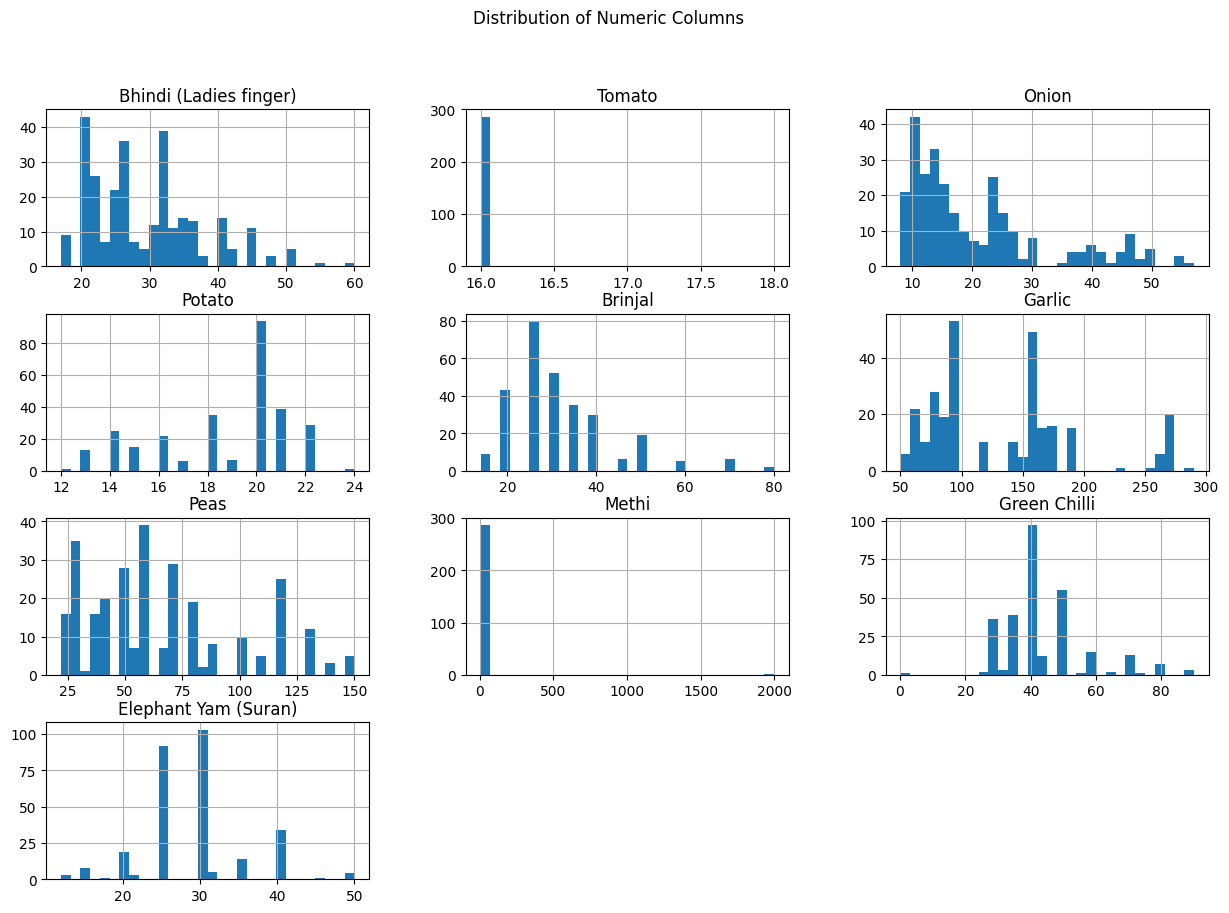

In [16]:
# Histogram for each numeric column
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

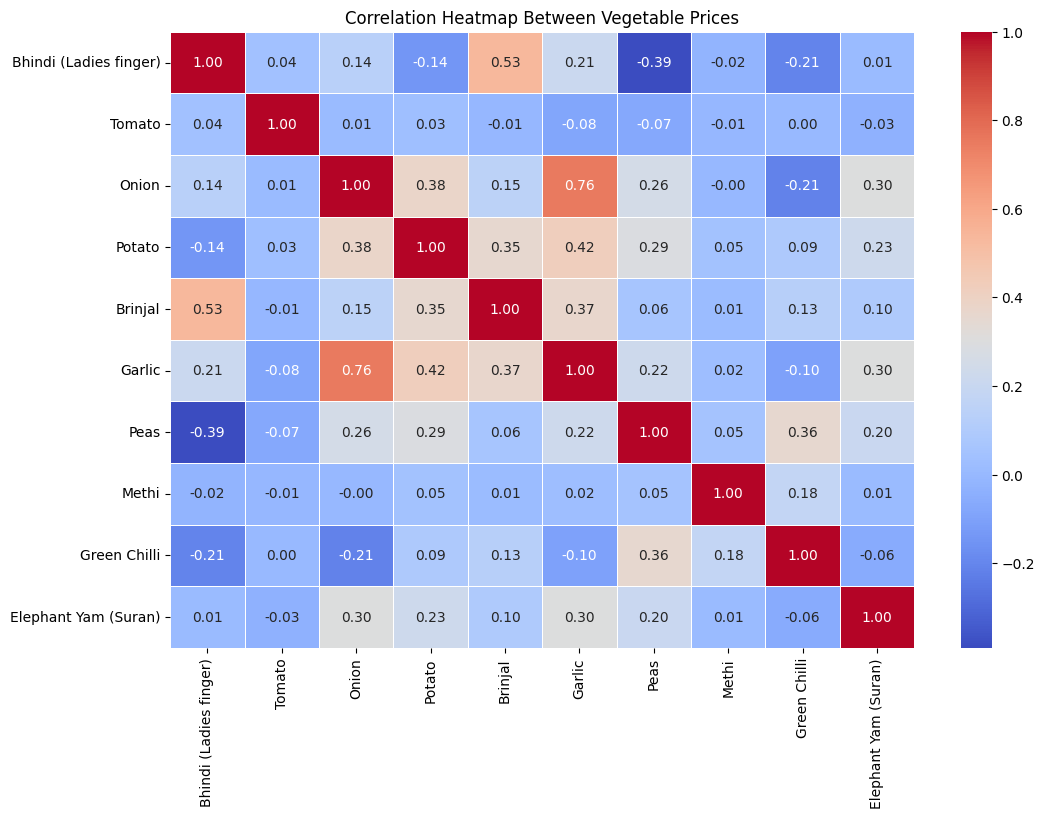

In [17]:
# Calculate the correlation matrix between vegetable prices
correlation_matrix = data[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
                           'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].corr()

# Plotting a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Vegetable Prices')
plt.show()


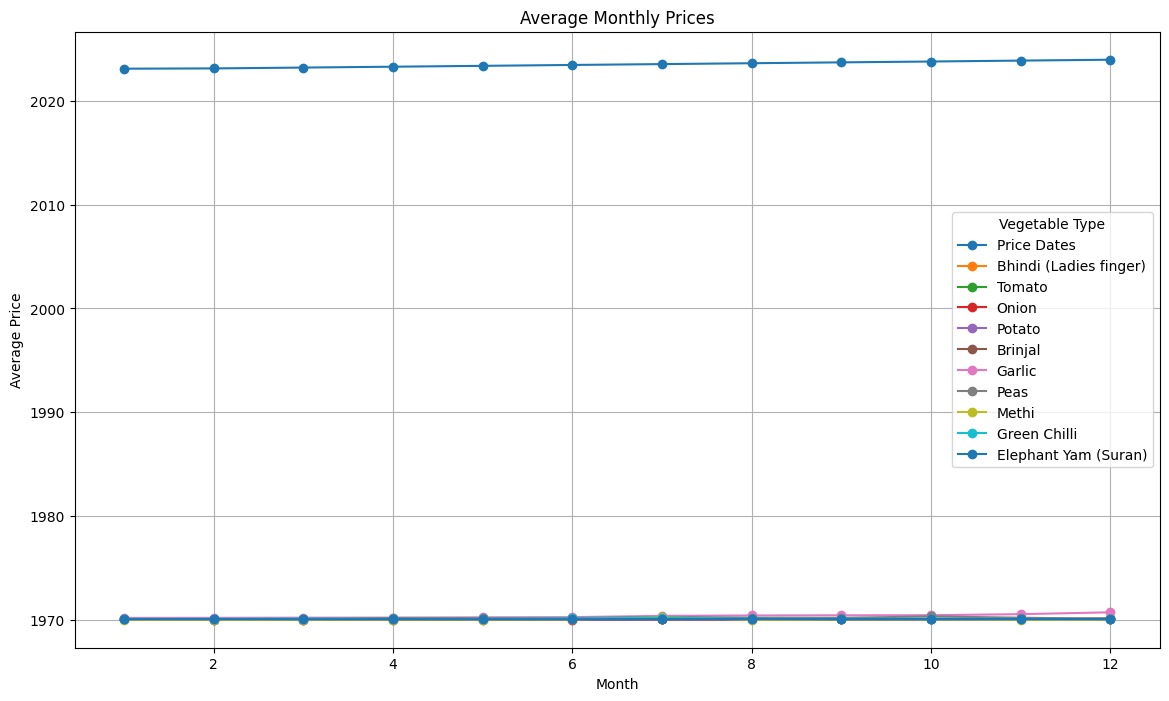

In [18]:
data['Price Dates'] = pd.to_datetime(data['Price Dates'], format="%d-%m-%Y", errors='coerce')

monthly_prices = data.groupby(data['Price Dates'].dt.month).mean()

# Plotting monthly price trends for each vegetable
plt.figure(figsize=(14, 8))
for column in monthly_prices.columns:
    plt.plot(monthly_prices.index, monthly_prices[column], marker='o', label=column)

plt.title("Average Monthly Prices")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(title="Vegetable Type")
plt.grid(True)
plt.show()